<a href="https://colab.research.google.com/github/sivaait023/Assignment_6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df1 = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
regr_cd = linear_model.LinearRegression()
X_cd= df1[['Ground Temperature']]
y_cd = df1['Chirps/Second']


NameError: ignored

In [ ]:
regr_cd.fit(X_cd, y_cd)
m_cd=regr_cd.coef_[0]
c_cd=regr_cd.intercept_
print("Linear Regression Equation:")
print("y={}*x+{}".format(m_cd,c_cd))

Linear Regression Equation:
y=0.20299973140771363*x+0.45931464523595267


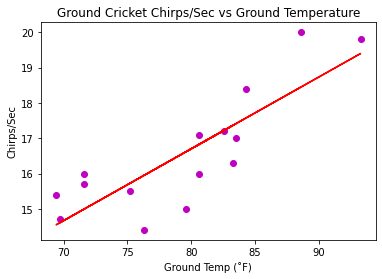

In [ ]:
y_pred1=regr_cd.predict(X_cd)
plt.scatter(X_cd, y_cd, color='m')
plt.plot(X_cd, y_pred1,color="r")
plt.title('Ground Cricket Chirps/Sec vs Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [ ]:
print("r2-score:")
r2_score=regr_cd.score(X_cd,y_cd)
if(r2_score>=0.8):
    print("Equation is good fit for this data(r-2score:{})".format(r2_score))
else:
  print("Bad Fit(r-2score:{})".format(r2_score))

r2-score:
Bad Fit(r-2score:0.6922946529146998)


In [ ]:
#4.Ground Temperature 95 F cricks = ?
y_predicted=regr_cd.predict([[95]])
print("At 95˚F, approximate chirps/sec is: {}".format(y_predicted[0]))

At 95˚F, approximate chirps/sec is: 19.74428912896875


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#y=mx+c => x=y-c/m
#approximate ground temperature that morning(X)=?
#y=18 chirps per second
y_given=18
X_temp=(y_given-c_cd)/m_cd
print("approximate ground temperature that morning(X)={:.2f} ˚F".format(X_temp))

approximate ground temperature that morning(X)=86.41 ˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df2 = pd.read_fwf("brain_body.txt")

In [ ]:
regr = linear_model.LinearRegression()
X = df2[['Body']]
y = df2['Brain']


In [ ]:
regr.fit(X, y)

LinearRegression()

In [ ]:
m=regr.coef_[0]
c=regr.intercept_
print("Linear Regression Equation:")
print("y={}*x+{}".format(m,c))

Linear Regression Equation:
y=0.9029129477287057*x+-56.85554542859637


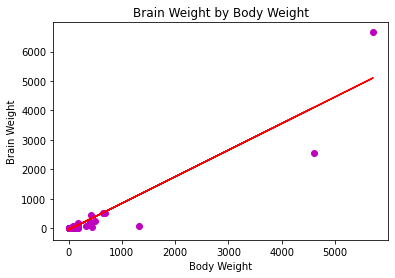

In [ ]:
y_pred=regr.predict(X)
plt.scatter(X, y, color='m')
plt.plot(X,y_pred,color="r")
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [ ]:
print("r2-score:")
r2_score=regr.score(X,y)
if(r2_score>=0.8):
    print("Equation is good fit for this data(r-2score:{})".format(r2_score))
else:
  print("Bad Fit")

r2-score:
Equation is good fit for this data(r-2score:0.8726620843043331)


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [4]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [5]:
x_features=["Sex", "Rank", "Year", "Degree", "YSdeg"]
X_features=df[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
Y=df['Salary']

In [6]:
lr_regre=linear_model.LinearRegression()
lr_regre.fit(X_features,Y)

LinearRegression()

In [7]:
print("Linear Equation:")
print("y={}* X+{}".format(lr_regre.coef_,lr_regre.intercept_))

Linear Equation:
y=[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]* X+11410.14654725559


In [8]:
def lin_reg_wrt_salary(salary_featured_cols, df, focus='Salary'):
    input_cols = df[salary_featured_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [9]:
lin_reg_wrt_salary(x_features,df)

0.8547180674410969

In [16]:
import itertools as it
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [17]:
combos = get_combos(x_features)

In [18]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_salary(list(n), df, focus)] = n
    return combo_scores

In [20]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180406, ('Sex', 'Year', 

In [21]:
print(" since rank and year together gives the best r2-score around 0.843-0.845 in combos")

 since rank and year together gives the best r2-score around 0.843-0.845 in combos


In [22]:
print("From r2-score it is worth saying that the combos with sex and alone is having low r2-score nearly 0.0638.From that we can say that sex will not have direct influence on salary")

From r2-score it is worth saying that the combos with sex and alone is having low r2-score nearly 0.0638.From that we can say that sex will not have direct influence on salary
